In [210]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import math

In [211]:
def import_from_excel(filename):
    df = pd.read_excel(filename)
    connections = {}
    for index, row in df.iterrows():
        person = row['person']
        connection = row['connection']
        weight = row['weight']
        if person not in connections:
            connections[person] = []
        connections[person].append({'person': connection, 'weight': weight})
    return connections

In [219]:
def visualize_connections(connections):
    rgb_color = (0, 0, 1)
    G = nx.Graph()
    for person, connections in connections.items():
        G.add_node(person)
        for connection in connections:
            G.add_edge(person, connection['person'], weight=connection['weight'])
    pos = nx.spring_layout(G, k=1/math.sqrt(len(G.nodes())), weight='weight')
    node_colors = [rgb_color for node in G.nodes()]  # Red color
    edge_colors = ['red' if G[u][v]['weight'] > 10 else 'black' for u, v in G.edges()]
    nx.draw(G, pos, node_color=node_colors, edge_color=edge_colors, with_labels=True, font_weight='bold', cmap=plt.cm.Blues)
    plt.show()

In [220]:
def export_to_excel(connections):
    data = []
    for person, connections in connections.items():
        for connection in connections:
            data.append({'person': person, 'connection': connection['person'], 'weight': connection['weight']})
    df = pd.DataFrame(data)
    df.to_excel('connections_output.xlsx', index=False)

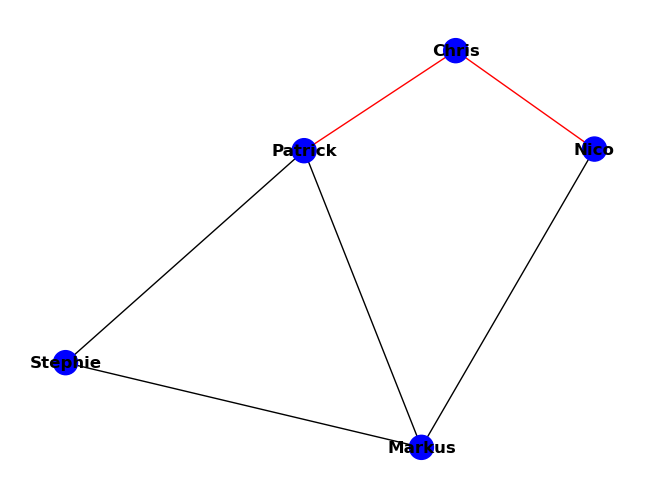

In [221]:
connections = import_from_excel('connections_input.xlsx')
visualize_connections(connections)
export_to_excel(connections)

# connections = {
#    'Person 1': [{'person': 'Person 2', 'weight': 2}, {'person': 'Person 3', 'weight': 3}],
#    'Person 2': [{'person': 'Person 1', 'weight': 2}, {'person': 'Person 3', 'weight': 1}, {'person': 'Person 4', 'weight': 3}],
#    'Person 3': [{'person': 'Person 1', 'weight': 3}, {'person': 'Person 2', 'weight': 1}, {'person': 'Person 4', 'weight': 2}, {'person': 'Person 5', 'weight': 3}],
#    'Person 4': [{'person': 'Person 2', 'weight': 3}, {'person': 'Person 3', 'weight': 2}, {'person': 'Person 5', 'weight': 1}],
#    'Person 5': [{'person': 'Person 3', 'weight': 3}, {'person': 'Person 4', 'weight': 1}]
# }

Node A: Closeness centrality = 0.80
Node B: Closeness centrality = 0.57
Node C: Closeness centrality = 0.80
Node D: Closeness centrality = 0.80
Node E: Closeness centrality = 0.50


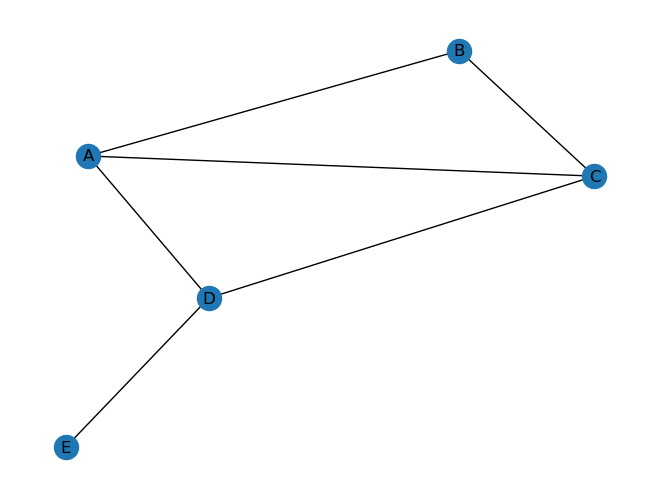

In [229]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
G.add_edges_from([('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('C', 'D'), ('D', 'E')])

# Calculate the closeness centrality of each node
closeness = nx.closeness_centrality(G)

# Print the closeness centrality of each node
for node, centrality in closeness.items():
    print(f"Node {node}: Closeness centrality = {centrality:.2f}")
pos = nx.spring_layout(G, k=1/math.sqrt(len(G.nodes())), weight='weight')
nx.draw(G, pos,with_labels=True)

In [225]:
print(closeness)

{'A': 0.8, 'B': 0.5714285714285714, 'C': 0.8, 'D': 0.8, 'E': 0.5}


Node A: Closeness centrality = 0.80
Node B: Closeness centrality = 0.57
Node C: Closeness centrality = 0.80
Node D: Closeness centrality = 0.80
Node E: Closeness centrality = 0.50
